# 4 - Data visualization

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (15, 7))

In [2]:
filmes = pd.read_csv('dados/tmdb_5000_movies.csv')
filmes.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Visualizando por categoria

In [4]:
filmes.original_language

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [6]:
filmes.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
cs       2
ro       2
id       2
ta       2
ar       2
el       1
no       1
ky       1
pl       1
sl       1
hu       1
af       1
vi       1
ps       1
te       1
tr       1
is       1
xx       1
nb       1
Name: original_language, dtype: int64

In [8]:
contagem_de_lingua = filmes.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']

In [9]:
contagem_de_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


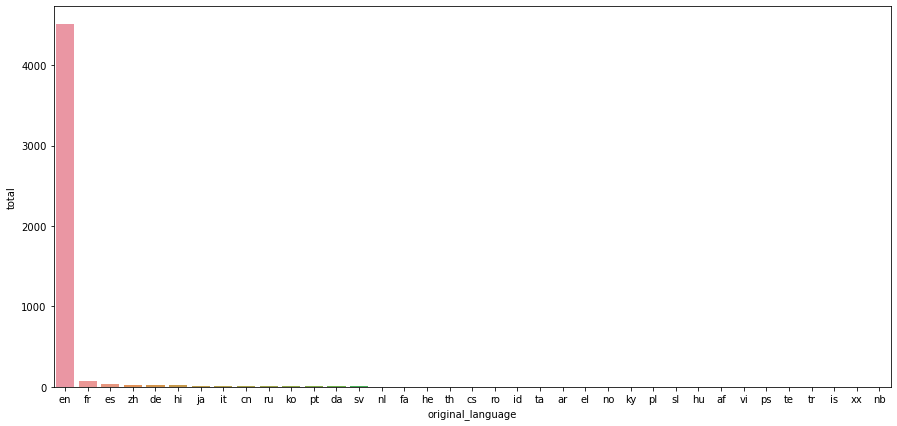

In [10]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

<Figure size 1080x576 with 0 Axes>

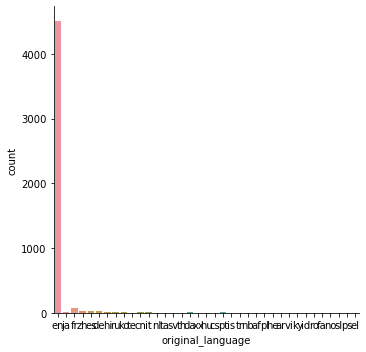

In [15]:
# usando o dado bruto com menos abstração
plt.figure(figsize = (15, 8))
sns.catplot(x = 'original_language', kind = 'count', data = filmes)

A visualização dos gráficos acima não ficou clara devido a disparidade da quantidade de filmes em inglês. Da mesma forma, como abaixo, um gráfico de pizza também não é capaz de exibir os dados corretamente. Inclusive, o gráfico de pizza é uma forma bastante ruim de apresentar os dados na maior parte das vezes.

([<matplotlib.patches.Wedge at 0x20efd8e4970>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text(

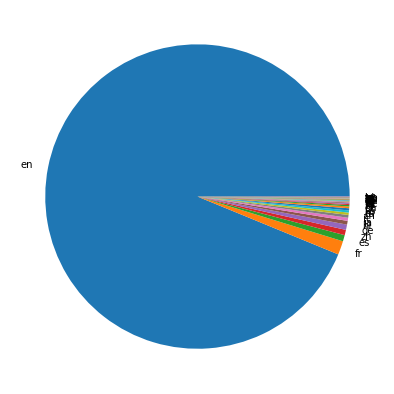

In [16]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

Como vimos, as visualizações considerando inglês e comparando com as outras linguas individualmente são bem ruins. Vamos então comparar inglês com todas as outras línguas.

In [23]:
total_por_lingua = filmes.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_outras_linguas = total_geral - total_ingles

print(total_ingles, total_outras_linguas)

4505 298


In [25]:
ingles_vs_outras = pd.DataFrame({
    'lingua': ['ingles', 'outros'],
    'total': [total_ingles, total_outras_linguas]
})
ingles_vs_outras

,lingua,total
0,ingles,4505
1,outros,298


([<matplotlib.patches.Wedge at 0x20efdc67b80>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

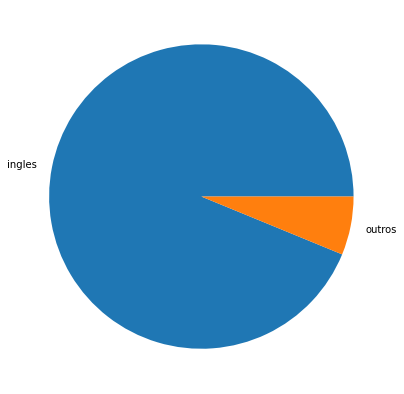

In [28]:
plt.pie(ingles_vs_outras['total'], labels = ingles_vs_outras['lingua'])

Mesmo assim o gráfico de pizza é difícil de visualizar, pois não temos uma dimensão clara de quantas vezes inglês é maior que as outras línguas.

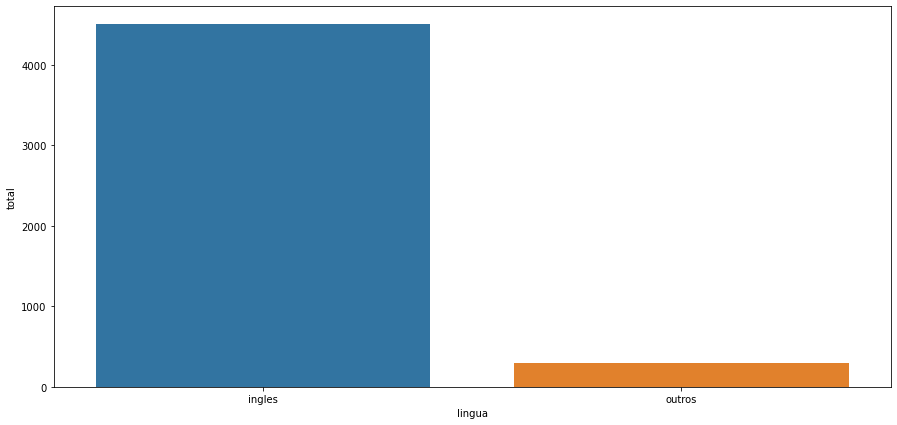

In [30]:
sns.barplot(data = ingles_vs_outras, x = 'lingua', y = 'total')

Nessa visualização é mais claro a diferença proporcional entre ingles e as outras linguas nesse dataset, ou seja, é possível medir visualmente o tamanho do _bias_ dessa fonte de dados.

### Análise dos filmes em idiomas diferentes do inglês

In [32]:
filmes_nao_ingles = filmes.query("original_language != 'en'")
filmes_nao_ingles.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
678,65000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,300168,[],zh,天將雄師,"Huo An, the commander of the Protection Squad ...",9.568884,"[{""name"": ""Shanghai Film Group"", ""id"": 3407}, ...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}, {""...",2015-02-19,121545703,127.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,When the Eagle meets the Dragon,Dragon Blade,5.9,145
786,68490000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://themonkeykingmovie.com,381902,"[{""id"": 207411, ""name"": ""monkey king""}]",zh,西游记之孙悟空三打白骨精,Taking place 500 years after the Havoc in Heav...,4.726290,"[{""name"": ""Filmko Pictures"", ""id"": 9175}]","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}, {""...",2016-01-22,193677158,120.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Monkey King 2,6.0,24
861,47000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,2841,"[{""id"": 90, ""name"": ""paris""}, {""id"": 549, ""nam...",fr,Un long dimanche de fiançailles,"In 1919, Mathilde was 19 years old. Two years ...",23.054510,"[{""name"": ""Gerber Pictures"", ""id"": 975}, {""nam...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",2004-10-26,0,133.0,"[{""iso_639_1"": ""co"", ""name"": """"}, {""iso_639_1""...",Released,Never let go,A Very Long Engagement,7.1,346
985,60000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,10047,"[{""id"

In [33]:
filmes_nao_ingles.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,2.980000e+02,298.000000,298.000000,2.980000e+02,297.000000,298.000000,298.000000
mean,8.646748e+06,77978.073826,11.134820,1.849205e+07,113.006734,6.492617,254.748322
std,1.553905e+07,107687.459347,14.894096,4.192266e+07,24.929630,1.265102,486.358454
min,0.000000e+00,19.000000,0.007254,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,8902.000000,2.220168,0.000000e+00,98.000000,6.000000,23.250000
50%,1.500000e+06,25580.000000,6.103734,0.000000e+00,110.000000,6.750000,90.500000
75%,1.100000e+07,88864.250000,14.003593,1.641250e+07,125.000000,7.200000,264.500000
max,9.725040e+07,407887.000000,118.968562,2.749251e+08,207.000000,8.300000,3840.000000


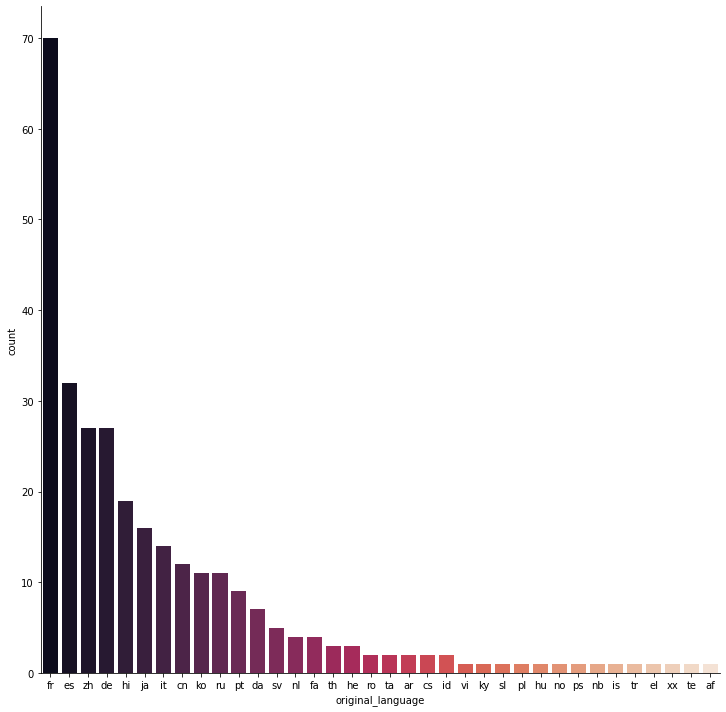

In [46]:
ordem_linguas_ni_frequencia = filmes_nao_ingles.original_language.value_counts().index

sns.catplot(
    x = 'original_language',
    kind = 'count',
    data = filmes_nao_ingles, 
    height = 10,
    legend = True,
    order = ordem_linguas_ni_frequencia,
    palette = 'rocket')